In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DATA.csv",skiprows = 99)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,360 angle,Up/down angle,Observed position,Body Rotation,Prone-sit class,Supine-recline class,Overall class
0,2024-08-01 11:50:17:000,0.0082,-0.057,-0.9780,74,0,30.5,NaN,NaN,NaN,NaN,NaN,NaN,180.480383,-3.337126,NaN,supine-recline,NaN,left side,left side
1,2024-08-01 11:50:17:010,0.0122,-0.073,-0.9899,74,0,30.5,NaN,NaN,NaN,NaN,NaN,NaN,180.706105,-4.219453,NaN,supine-recline,NaN,left side,left side
2,2024-08-01 11:50:17:020,0.0082,-0.073,-0.9780,74,0,30.5,NaN,NaN,NaN,NaN,NaN,NaN,180.480383,-4.270778,NaN,supine-recline,NaN,left side,left side
3,2024-08-01 11:50:17:030,0.0162,-0.077,-0.9899,74,0,30.5,NaN,NaN,NaN,NaN,NaN,NaN,180.937578,-4.449495,NaN,supine-recline,NaN,left side,left side
4,2024-08-01 11:50:17:040,0.0082,-0.073,-0.9740,74,0,30.5,NaN,NaN,NaN,NaN,NaN,NaN,180.482356,-4.288251,NaN,supine-recline,NaN,left side,left side


In [4]:
df.drop(df.columns[[5,7,8,9,10,11,12]], axis=1, inplace = True)

In [5]:
df = df.rename(columns = {'Unnamed: 0':'Timing'})

In [6]:
df['Timing'] = pd.to_datetime(df['Timing'], format='%Y-%m-%d %H:%M:%S:%f')

In [7]:
df['Milliseconds'] = df['Timing'].dt.microsecond // 1000

In [8]:
df['Time Diff'] = df['Milliseconds'].diff()

# Data Validation

In [9]:
# pd.unique(df['Milliseconds'].diff())

df['Milliseconds'].diff().value_counts()

 10.0     19899
-990.0      200
Name: Milliseconds, dtype: int64

In [10]:
df['Milliseconds'].count()

20100

In [11]:
# df[df['Time Diff']<=0].groupby('Overall class ')['Overall class '].count()

idx_lst = list(df[df['Time Diff']<=0].index)

set([t - s for s, t in zip(idx_lst, idx_lst[1:])])

{100}

In [12]:
# df['Milliseconds']

# set(df['Milliseconds'].diff())

df['Time Diff'].unique()

array([  nan,   10., -990.])

In [14]:
# df[df['Milliseconds'].diff().isna()] # First Row 

df[df['Milliseconds'].diff()<0] # Changing from 990 to 0 

df[df['Milliseconds'].diff()<0]['Timing'].count()

200

In [19]:
# df['Time Diff (s)'].unique()
# df[df['Time Diff (s)']==0.01]
# df[df['Time Diff (s)']==0.]

# If the previous row has the same overall class then add to the sum or 

# Simply set the Time Diff = 0.01 where the Time Diff = -.099

In [18]:
df.loc[df['Time Diff']<0,'Time Diff'] = 10.0
df['Time Diff'].unique()

array([nan, 10.])

In [20]:
df['Time Diff (s)'] = df['Time Diff']/1000

In [21]:
df['Time Diff (s)'].unique()

array([ nan, 0.01])

df.loc[df['Time Diff (s)'].isna(),'Time Diff (s)'] = 0.01
df['Time Diff (s)'].unique()

#### OLD DATA 

left side : 23.06
prone : 20.82
prone supported : 62.59
reclined : 53.71
right side : 2.08
supine : 19.82
upright : 1.99

Old Total 184.07000000000002

In [22]:
# df.groupby('Overall class ')['Time Diff'].sum()

df['Time Diff (s)'] = df['Time Diff (s)'].fillna(0).clip(lower=0.01)

grouped_df = df.groupby('Overall class ')['Time Diff (s)'].sum().reset_index()

print(grouped_df)

    Overall class   Time Diff (s)
0        left side          23.28
1            prone          21.04
2  prone supported          63.23
3         reclined          54.24
4       right side           2.11
5           supine          20.02
6          upright           2.01


In [23]:
grouped_df['Time Diff (s)'].sum()

185.93000000000004

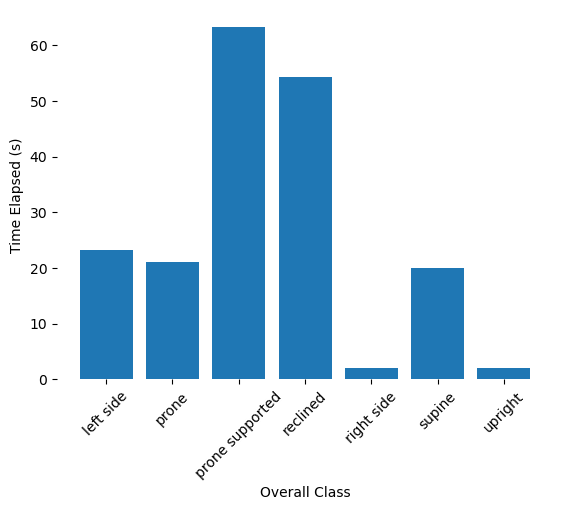

In [24]:
ax = plt.bar(data = grouped_df, x = 'Overall class ',height = 'Time Diff (s)')

plt.xlabel('Overall Class')
plt.ylabel('Time Elapsed (s)')

sns.despine(bottom = True, left = True)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

plt.show()

In [ ]:
# df.groupby('Overall class ')['Milliseconds'].diff().reset_index()

In [25]:
df[df['Overall class '].isna()].groupby('Body Rotation')['Timing'].count()/1000 # Missing Seconds

Body Rotation
prone-sit    1.507
Name: Timing, dtype: float64

In [26]:
td = df['Timing'].max() - df['Timing'].min()

secs = td.total_seconds()

print(secs)

200.99


In [27]:
df_check = df[['Timing','Body Rotation','Overall class ']]

In [28]:
# df_check.groupby('Overall class ')['Timing'].cumsum()

# df['Overall '].sort_values(by='date').cumsum()

# df.sort_values('Timing').groupby(['Body Rotation']).cumcount()+1

df_check['RN'] = df_check.sort_values('Timing').groupby(['Overall class ']).cumcount()+1

# df_check[df_check['RN'] < df_check['RN'].shift(1)]['Timing'].count()

C:\Users\saira\AppData\Local\Temp\ipykernel_7668\2484361359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['RN'] = df_check.sort_values('Timing').groupby(['Overall class ']).cumcount()+1


In [29]:
df_check[df_check['RN'] < df_check['RN'].shift(1)].groupby('Overall class ')['Overall class '].count()

Overall class 
left side           31
prone              123
prone supported     17
reclined             9
right side          11
supine              20
upright             20
Name: Overall class , dtype: int64

In [30]:
# df.count()

# Body Rotation --> 20100

# Prone Sit 8628 + Supine-Recline 9965 --> 18593 (Overall Class)

# Shift in Class --> 200

# Missing --> 1507

print("Missing Count",20100-18593)

# df.describe()

# df

Missing Count 1507


In [31]:
df.groupby('Body Rotation')['Body Rotation'].count()

Body Rotation
prone-sit         10135
supine-recline     9965
Name: Body Rotation, dtype: int64

In [32]:
df[(df['Body Rotation'] == 'prone-sit') & (df['Overall class ']=='prone')]

,Timing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 6,360 angle,Up/down angle,Observed position,Body Rotation,Prone-sit class,Supine-recline class,Overall class,Milliseconds,Time Diff,Time Diff (s)
76,2024-08-01 11:50:17.760,-0.0239,0.0270,-0.0078,130,30.5,108.074603,47.066230,NaN,prone-sit,prone,NaN,prone,760,10.0,0.01
2849,2024-08-01 11:50:45.490,-2.1919,2.1906,-0.0039,297,29.5,90.101945,45.005775,NaN,prone-sit,prone,NaN,prone,490,10.0,0.01
6238,2024-08-01 11:51:19.380,-0.5619,0.3389,-0.6691,111,29.0,139.976971,21.210611,NaN,prone-sit,prone,NaN,prone,380,10.0,0.01
6239,2024-08-01 11:51:19.390,-0.5780,0.3189,-0.6612,111,29.0,138.841079,19.967149,NaN,prone-sit,prone,NaN,prone,390,10.0,0.01
6240,2024-08-01 11:51:19.400,-0.6181,0.3189,-0.6691,111,29.0,137.268923,19.304557,NaN,prone-sit,prone,NaN,prone,400,10.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16899,2024-08-01 11:53:05.990,-0.1685,0.0390,0.0397,726,28.5,76.742424,12.702392,NaN,prone-sit,prone,NaN,prone,990,10.0,0.01
16900,2024-08-01 11:53:06.000,-0.2046,0.1149,0.0991,726,28.5,64.156321,26.826444,NaN,prone-sit,prone,NaN,prone,0,10.0,0.01
16901,2024-08-01 11:53:06.010,-0.1323,0.1629,0.0555,726,28.5,67.241896,48.653576,NaN,prone-sit,prone,NaN,prone,10,10.0,0.01
16902,2024-08-01 11:53:06.020,-0.0721,0.1149,0.0159,726,28.5,77.563781,57.305085,NaN,prone-sit,prone,NaN,prone,20,10.0,0.01


In [33]:
df[df['Body Rotation'] == 'prone-sit']['Overall class '].value_counts()

prone supported    6323
prone              2104
upright             201
Name: Overall class , dtype: int64

In [34]:
df.groupby('Overall class ')['Overall class '].count()

Overall class 
left side          2328
prone              2104
prone supported    6323
reclined           5424
right side          211
supine             2002
upright             201
Name: Overall class , dtype: int64

In [35]:
gp_df = df.groupby(['Body Rotation','Overall class '])['Timing'].count().reset_index().rename(columns = {'Timing':'Row Count'}).sort_values(by = 'Row Count',ascending = False)

In [37]:
# df['Body Rotation'].isna().sum()

# df['Body Rotation'].unique() --> supine-recline & prone-sit Total Count = 20100
 
# df.groupby('Body Rotation')['Timing'].count()

df.groupby(['Body Rotation','Overall class '])['Timing'].count()

Body Rotation   Overall class  
prone-sit       prone              2104
                prone supported    6323
                upright             201
supine-recline  left side          2328
                reclined           5424
                right side          211
                supine             2002
Name: Timing, dtype: int64

In [36]:
df.set_index('Overall class ').isna().groupby(level=0).sum()

,Timing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 6,360 angle,Up/down angle,Observed position,Body Rotation,Prone-sit class,Supine-recline class,Milliseconds,Time Diff,Time Diff (s)
Overall class,,,,,,,,,,,,,,,
left side,0,0,0,0,0,0,0,0,2328,0,2328,0,0,1,0
prone,0,0,0,0,0,0,0,0,2104,0,0,2104,0,0,0
prone supported,0,0,0,0,0,0,0,0,6323,0,0,6323,0,0,0
reclined,0,0,0,0,0,0,0,0,5424,0,5424,0,0,0,0
right side,0,0,0,0,0,0,0,0,211,0,211,0,0,0,0
supine,0,0,0,0,0,0,0,0,2002,0,2002,0,0,0,0
upright,0,0,0,0,0,0,0,0,201,0,0,201,0,0,0


In [38]:
gp_df.sort_values(by = 'Body Rotation')

,Body Rotation,Overall class,Row Count
1,prone-sit,prone supported,6323
0,prone-sit,prone,2104
2,prone-sit,upright,201
4,supine-recline,reclined,5424
3,supine-recline,left side,2328
6,supine-recline,supine,2002
5,supine-recline,right side,211


In [39]:
gp_df['Row Count'].cumsum()

1     6323
4    11747
3    14075
0    16179
6    18181
5    18392
2    18593
Name: Row Count, dtype: int64